<a href="https://colab.research.google.com/github/denisecammarota/qbio2021/blob/main/Chemostat_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chemostat Model

In [ ]:
#@title 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
plt.style.use('seaborn')

## Single species Chemostat Model - quick checking

In [ ]:
#@title 
def chemostat_model_single(y,t,b,k,R_0,D,c,m):
  N,R = y
  mu = b*R/(k+R) 
  dNdt = N*(mu-m)
  dRdt = D*(R_0 - R) - c*mu*N
  return dNdt,dRdt
##apparently it works okay like this, let's make some quick trivial checks

In [ ]:
#@title 
def chemostat_equilibrium_single(b,k,R_0,D,c,m):
  R_eq = m*k/(b-m)
  N_eq = (D/(c*m))*(R_0 - R_eq)
  return N_eq,R_eq

### First check: code is working?

If no species, only resource, resource should follow simple exponential equation by itself, decreasing with initial conditions like initial resouce > R_0. In the contrary case, it should increase. If equal, they stay constant.

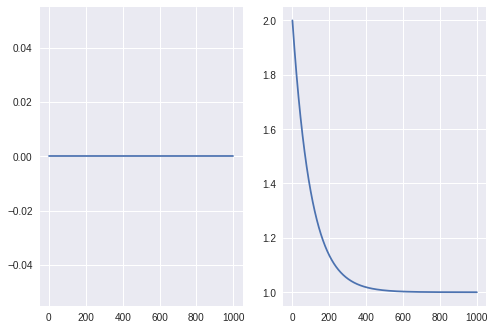

In [ ]:
#@title 
y0 = 0,2
t = np.linspace(0,1000,1000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.01
c = 0.1
m = 0.01
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
#N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
#ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
#ax2.axhline(R_eq,color='r')
plt.show()

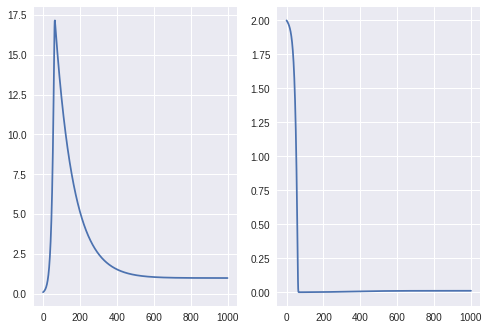

In [ ]:
#@title 
y0 = 0.1,2
t = np.linspace(0,1000,1000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.001
c = 0.1
m = 0.01
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
#ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
#ax2.axhline(R_eq,color='r')
plt.show()

### Second check: are the equilibrium predicted correct?

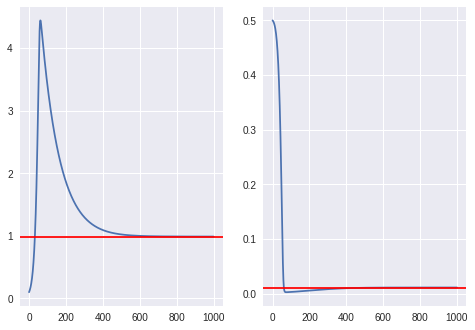

In [ ]:
#@title 
y0 = 0.1,0.5
t = np.linspace(0,1000,1000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.001
c = 0.1
m = 0.01
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
ax2.axhline(R_eq,color='r')
plt.show()

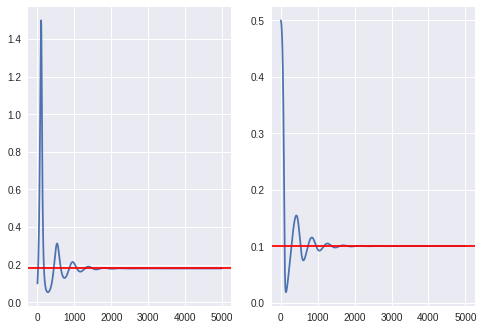

In [ ]:
#@title 
y0 = 0.1,0.5
t = np.linspace(0,5000,5000)
b = 0.1
k = 0.1
R_0 = 1
D = 0.001
c = 0.1
m = 0.05
result = odeint(chemostat_model_single, y0, t, args=(b,k,R_0,D,c,m))
N, R = result.T
N_eq,R_eq = chemostat_equilibrium_single(b,k,R_0,D,c,m)
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(t,N)
ax1.axhline(N_eq,color='r')
ax2.plot(t,R)
ax2.axhline(R_eq,color='r')
plt.show()

## Two species Chemostat Model - quick checking

In [ ]:
#@title 
def chemostat_model_double(y,t,b_1,b_2,b_3,k_1,k_2,k_3,R_0,D,c_1,c_2,c_3,m_1,m_2,m_3):
  N_1,N_2,N_3,R = y
  mu_1 = b_1*R/(k_1+R)
  mu_2 = b_2*R/(k_2+R) 
  mu_3 = b_3*R/(k_3+R) 
  dN_1dt = N_1*(mu_1-m_1)
  dN_2dt = N_2*(mu_2-m_2)
  dN_3dt = N_3*(mu_3-m_3)
  dRdt = D*(R_0 - R) - c_1*mu_1*N_1 - c_2*mu_2*N_2 - c_3*mu_3*N_3
  return dN_1dt,dN_2dt,dN_3dt,dRdt
##apparently it works okay like this, let's make some quick trivial checks

In [ ]:
#@title 
def chemostat_equilibrium_double(b_1,b_2,k_1,k_2,R_0,D,c_1,c_2,m_1,m_2):
  R_eq1 = m_1*k_1/(b_1-m_1)
  R_eq2 = m_2*k_2/(b_2-m_2)
  N_1_eq = (D/(c_1*m_1))*(R_0 - R_eq1)
  N_2_eq = (D/(c_2*m_2))*(R_0 - R_eq2)
  return N_1_eq,N_2_eq,R_eq1,R_eq2

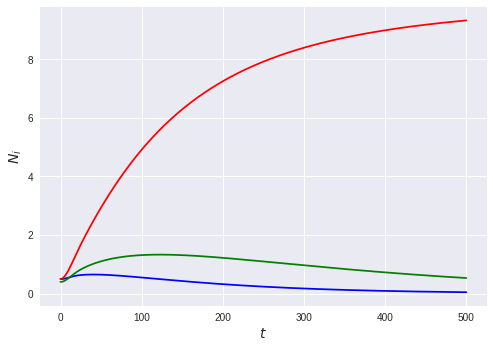

In [ ]:
#@title 
y0 = 0.5,0.4,0.5,0.
t = np.linspace(0,500,500)
b_1 = 0.1
b_2 = 0.2
b_3 = 0.3
k_1 = 0.1
k_2 = 0.1
k_3 = 0.1
R_0 = 1
D = 0.01
c_1 = 0.1
c_2 = 0.1
c_3 = 0.1
m_1 = 0.01
m_2 = 0.01
m_3 = 0.01
result = odeint(chemostat_model_double, y0, t, args=(b_1,b_2,b_3,k_1,k_2,k_3,R_0,D,c_1,c_2,c_3,m_1,m_2,m_3))
N_1,N_2,N_3, R = result.T
#N_1_eq,N_2_eq,R_eq1,R_eq2 = chemostat_equilibrium_double(b_1,b_2,b_3,k_1,k_2,k_3,R_0,D,c_1,c_2,c_3,m_1,m_2,m_3)
#fig, (ax1,ax2,ax3) = plt.subplots(1,3)
#ax1.plot(t,N_1)
#ax1.axhline(N_1_eq,color='r')
#ax1.axhline(0,color='r')
#ax2.plot(t,N_2)
#ax2.axhline(0,color='r')
#ax2.axhline(N_2_eq,color='r')
#ax3.plot(t,R)
#ax3.axhline(R_eq1,color='r')
#ax3.axhline(R_eq2,color='r')
plt.plot(t,N_1,color='blue')
plt.plot(t,N_2,color='green')
plt.plot(t,N_3,color='red')
plt.xlabel(r'$t$',fontsize=14)
plt.ylabel(r'$N_i$',fontsize=14)
plt.show()

## Multi-species Chemostat Model and one resource (general case)

In [ ]:
def chemostat_model(y,t,b_i,k_i,R_0,D,c_i,m_i):
  N_i,R = y[:-1],y[-1] #N array, R single number
  N_i = np.array(N_i)
  R = np.array(R)
  mu_i = b_i*R/(k_i+R)
  dRdt = D*(R_0 - R) - np.sum(c_i*mu_i*N_i)
  dN_idt = N_i*(mu_i - m_i)
  return list(dN_idt)+[dRdt]

In [ ]:
b_i = np.array([0.3,0.2,0.1])
k_i = np.array([0.1,0.1,0.1])
R_0 = 1
D = 0.01
c_i = np.array([0.1,0.1,0.1])
m_i = np.array([0.01,0.01,0.01])
N_i = [0.5,0.4,0.5]
R_i = [0]
y0 = N_i + R_i
t = 0
chemostat_model(y0,t,b_i,k_i,R_0,D,c_i,m_i)

[-0.005, -0.004, -0.005, 0.01]

In [ ]:
t = np.linspace(0,500,500)
result = odeint(chemostat_model, y0, t, args=(b_i,k_i,R_0,D,c_i,m_i))

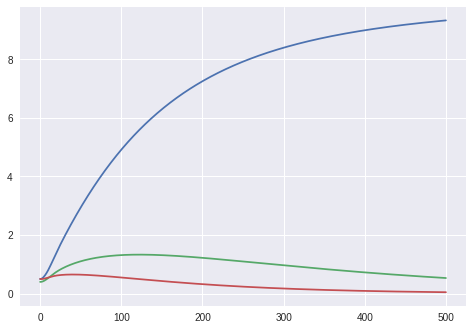

In [ ]:
plt.plot(t,result[:,:-1])
plt.show()

## Multi-species Chemostat Model and one resource (noisy R_0, external forcing)

In [ ]:
def forcing_cos(t):
  alpha = 1
  omega = 0.1
  return alpha*np.cos(omega*t)

In [ ]:
def chemostat_model_cos(y,t,b_i,k_i,R_0,D,c_i,m_i):
  N_i,R = y[:-1],y[-1] #N array, R single number
  N_i = np.array(N_i)
  R = np.array(R)
  mu_i = b_i*R/(k_i+R)
  dRdt = D*(R_0+forcing_cos(t) - R) - np.sum(c_i*mu_i*N_i)
  dN_idt = N_i*(mu_i - m_i)
  return list(dN_idt)+[dRdt]

In [ ]:
b_i = np.array([0.3,0.2,0.1])
k_i = np.array([0.1,0.1,0.1])
R_0 = 0.5
D = 0.1
c_i = np.array([0.1,0.1,0.1])
m_i = np.array([0.01,0.01,0.01])
N_i = [0.5,0.5,0.5]
R_i = [2]
y0 = N_i + R_i
t = 0
omega = 0.01
chemostat_model_cos(y0,t,b_i,k_i,R_0,D,c_i,m_i)

[0.13785714285714284,
 0.09023809523809523,
 0.04261904761904762,
 -0.07857142857142857]

In [ ]:
t = np.linspace(0,2000,2000)
result = odeint(chemostat_model_cos, y0, t, args=(b_i,k_i,R_0,D,c_i,m_i))

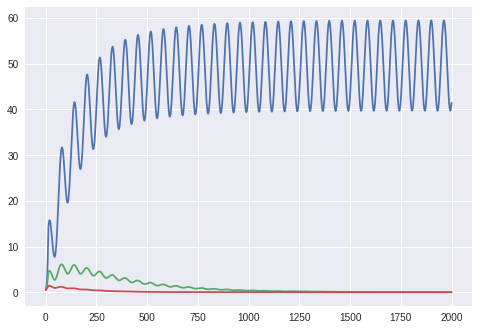

In [ ]:
plt.plot(t,result[:,:-1])
plt.show()

## Metacommunity approach
The community simulator: https://github.com/Emergent-Behaviors-in-Biology/community-simulator